In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import random
import os

import loaddata
import stimulation
import behaviour
import params

In [2]:
STORM = '#0c2431'
TEAL = '#205a60'
SUNBURST = '#d37556'
SAND = '#d8a28c'

In [3]:
fly_dir = "/mnt/nas2/FH/from_Jonas/220920_DfdxGCaMP6s_MDN3xCsChrimson/Fly1"
all_trial_dirs = ["001_xz_plevels"]
trigger = "laser_start"
stim_p = [1, 5, 10, 20]
return_var = "v_forw"

In [4]:
twop_df, beh_df = loaddata.load_data(
        fly_dir,
        all_trial_dirs=all_trial_dirs,
    )
all_stim_responses, all_beh_responses = stimulation.get_neural_responses(  # already dff!
    twop_df,
    trigger=trigger,
    trials=all_trial_dirs,
    stim_p=stim_p,
    return_var=return_var,
)
all_beh_class_responses = stimulation.get_beh_class_responses(
    beh_df,
    trigger=trigger,
    trials=all_trial_dirs,
    stim_p=stim_p,
)
walk_pre, rest_pre = behaviour.get_pre_stim_beh(
    beh_df,
    stim_p=stim_p,
    trials=all_trial_dirs,
) 

/home/hurtak/miniconda3/envs/twoppp/lib/python3.7/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


could not find olfac_stim in 220920 DfdxGCaMP6s_MDN3xCsChrimson 1 001_xz_plevels


In [5]:
for c in twop_df.columns:
    print(c)

t
abs_t
v
th
v_forw
v_side
laser_stim
laser_power
laser_power_uW
laser_start
laser_stop
back
walk
rest
beh_catvar
neuron_denoised_0
neuron_denoised_1
neuron_denoised_2
neuron_denoised_3
neuron_denoised_4
neuron_denoised_5
neuron_denoised_6
neuron_denoised_7
neuron_denoised_8
neuron_denoised_9
neuron_denoised_10
neuron_denoised_11
neuron_denoised_12
neuron_denoised_13
neuron_denoised_14
neuron_denoised_15
neuron_denoised_16
neuron_denoised_17
neuron_denoised_18
neuron_denoised_19
neuron_denoised_20
neuron_denoised_21
neuron_denoised_22
neuron_denoised_23
neuron_denoised_24
neuron_denoised_25
neuron_denoised_26
neuron_denoised_27
neuron_denoised_28
neuron_denoised_29
neuron_denoised_30
neuron_denoised_31
neuron_denoised_32
neuron_denoised_33
neuron_denoised_34
neuron_denoised_35
neuron_denoised_36
neuron_denoised_37
neuron_denoised_38
neuron_denoised_39
neuron_denoised_40
neuron_denoised_41
neuron_denoised_42
neuron_denoised_43
neuron_denoised_44
neuron_denoised_45
neuron_denoised_46
neu

Text(0, 0.5, 'Laser power (a.u.)')

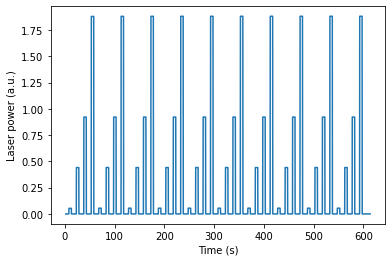

In [6]:
plt.plot(twop_df["t"], twop_df["laser_power"])
plt.xlabel("Time (s)")
plt.ylabel("Laser power (a.u.)")

Text(0, 0.5, 'Forward velocity (mm/s)')

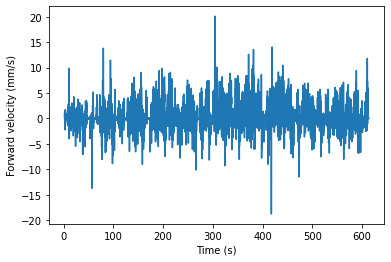

In [7]:
plt.plot(twop_df["t"], twop_df["v_forw"])
plt.xlabel("Time (s)")
plt.ylabel("Forward velocity (mm/s)")

51


Text(0, 0.5, 'Neural activity (a.u.)')

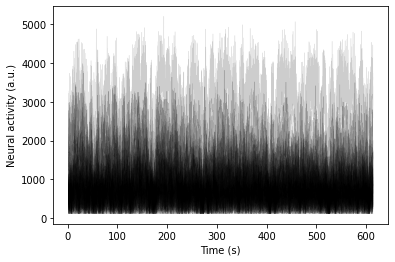

In [8]:
neuron_name = "neuron_0"
i = 0
while neuron_name in twop_df.columns:
    plt.plot(twop_df["t"], twop_df[neuron_name], c="k", alpha=0.1, linewidth=0.5)
    neuron_name = "neuron_" + str(i)
    i += 1
print(i)
plt.xlabel("Time (s)")
plt.ylabel("Neural activity (a.u.)")    

# Stim_responses

In [9]:
print(all_stim_responses.shape)

(243, 50, 40)


Text(0, 0.5, 'Neural activity (a.u.)')

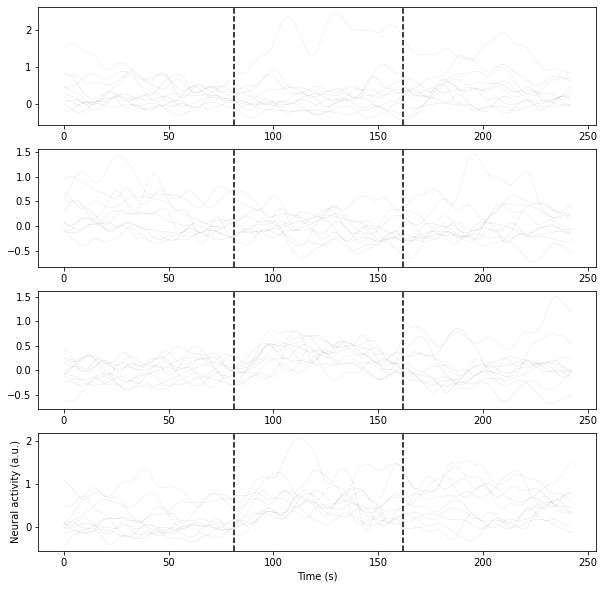

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for essay in range(10):
    for i in range(24,25): #50 neurons
        axs[0].plot(all_stim_responses[:,i,4*essay], c="k", alpha=0.1, linewidth=0.5)
        axs[1].plot(all_stim_responses[:,i,4*essay+1], c="k", alpha=0.1, linewidth=0.5)
        axs[2].plot(all_stim_responses[:,i,4*essay+2], c="k", alpha=0.1, linewidth=0.5)
        axs[3].plot(all_stim_responses[:,i,4*essay+3], c="k", alpha=0.1, linewidth=0.5)
response_t_params = params.response_t_params_2p
for ax_idx in range(4):
    # draw a vertical line at the time of the stimulus
    axs[ax_idx].axvline(response_t_params[0], c="k", linestyle="--")
    axs[ax_idx].axvline(response_t_params[0]+response_t_params[1], c="k", linestyle="--")

plt.xlabel("Time (s)")
plt.ylabel("Neural activity (a.u.)")



In [11]:
print(all_beh_responses.shape)

(243, 40)


Text(0, 0.5, 'Forward velocity (mm/s)')

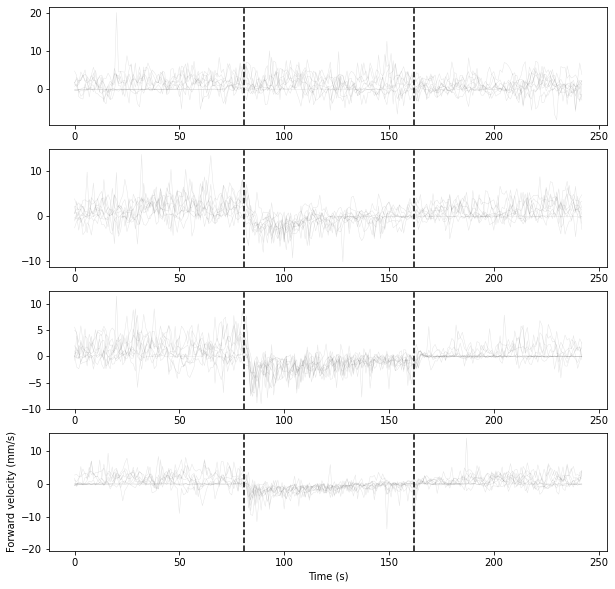

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for essay in range(10):
    axs[0].plot(all_beh_responses[:,4*essay], c="k", alpha=0.1, linewidth=0.5)
    axs[1].plot(all_beh_responses[:,4*essay+1], c="k", alpha=0.1, linewidth=0.5)
    axs[2].plot(all_beh_responses[:,4*essay+2], c="k", alpha=0.1, linewidth=0.5)
    axs[3].plot(all_beh_responses[:,4*essay+3], c="k", alpha=0.1, linewidth=0.5)
response_t_params = params.response_t_params_2p
for ax_idx in range(4):
    # draw a vertical line at the time of the stimulus
    axs[ax_idx].axvline(response_t_params[0], c="k", linestyle="--")
    axs[ax_idx].axvline(response_t_params[0]+response_t_params[1], c="k", linestyle="--")

plt.xlabel("Time (s)")
plt.ylabel("Forward velocity (mm/s)")

In [13]:
print(beh_df.columns)

Index(['t', 'abs_t', 'twop_index', 'v_raw', 'th_raw', 'x', 'y',
       'integrated_forward_movement', 'integrated_side_movement',
       'delta_rot_lab_side', 'delta_rot_lab_forward', 'delta_rot_lab_turn',
       'v', 'th', 'v_forw', 'v_side', 'v_turn', 'laser_stim', 'laser_cond',
       'laser_power', 'laser_power_uW', 'laser_start', 'laser_stop',
       'me_front', 'me_back', 'me_all', 'me_mid', 'anus_x', 'anus_x_rel_neck',
       'anus_y', 'anus_y_rel_neck', 'ovum_x', 'ovum_x_rel_neck', 'ovum_y',
       'ovum_y_rel_neck', 'hrtita_x', 'hrtita_x_rel_neck', 'hrtita_y',
       'hrtita_y_rel_neck', 'mrtita_x', 'mrtita_x_rel_neck', 'mrtita_y',
       'mrtita_y_rel_neck', 'frtita_x', 'frtita_x_rel_neck', 'frtita_y',
       'frtita_y_rel_neck', 'frcofe_x', 'frcofe_x_rel_neck', 'frcofe_y',
       'frcofe_y_rel_neck', 'frfeti_x', 'frfeti_x_rel_neck', 'frfeti_y',
       'frfeti_y_rel_neck', 'stripe4_x', 'stripe4_x_rel_neck', 'stripe4_y',
       'stripe4_y_rel_neck', 'neck_x', 'neck_x_rel_neck'

# Align pre-stimulus

In [11]:
def zero_pre_stim_aligned_data(
        data: np.ndarray,
        t_stim_onset: int = params.response_t_params_2p[0],
        method: str = "per_trace"):
    """
    Offset all the stimulation aligned data such that the neural signal is zero
    just before the stimulation onset.
    Parameters
    ----------
    data : np.ndarray
        The data to be aligned. Format time x neurons x trials.
    t_stim_onset : int, optional
        The time point of the stimulation onset, by default
        params.response_t_params_2p[0]
    method : str, optional
        The method to use for the alignment, by default "per_trace". Can be
        either "per_trace" or "per_neuron".
    Returns
    -------
    np.ndarray
        The aligned data.
    """
    if method == "per_trace":
        # for each trace, find the value at the time of the stimulation onset
        # and subtract it from all the values in the trace
        data = data - data[t_stim_onset, :, :]
    elif method == "per_neuron":
        # for each neuron, find the value at the time of the stimulation onset
        # and subtract it from all the values in the neuron
        data = data - data[t_stim_onset, :, :].mean(axis=0)
    else:
        raise ValueError("method must be either per_trace or per_neuron")
    return data
corrected_all_stim_responses = zero_pre_stim_aligned_data(all_stim_responses)



Text(0, 0.5, 'Delta Neural activity (a.u.)')

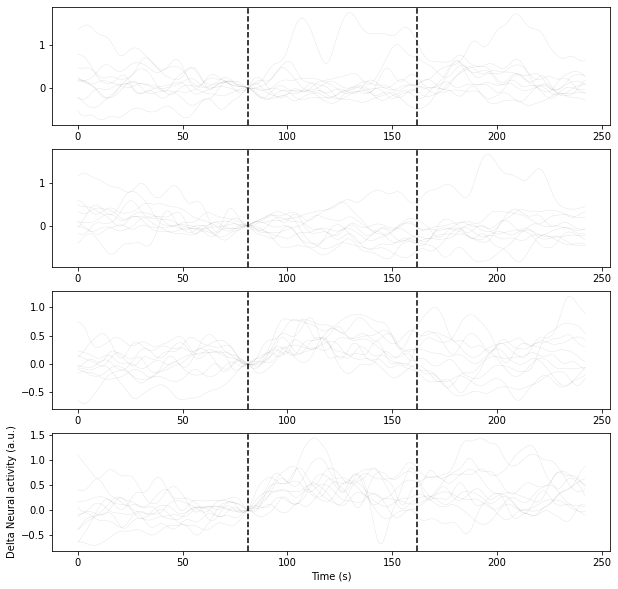

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for essay in range(10):
    for i in range(24,25): #50 neurons
        for ax_id in range(4):
            axs[ax_id].plot(corrected_all_stim_responses[:,i,4*essay+ax_id], c="k", alpha=0.1, linewidth=0.5)
response_t_params = params.response_t_params_2p
for ax_idx in range(4):
    # draw a vertical line at the time of the stimulus
    axs[ax_idx].axvline(response_t_params[0], c="k", linestyle="--")
    axs[ax_idx].axvline(response_t_params[0]+response_t_params[1], c="k", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Delta Neural activity (a.u.)")



In [13]:
# Low pass filter behavioural data
def low_pass_beh_traces(
        beh_data:np.ndarray,
        tau:float = 0.5,
        fs:float = params.fs_2p,
        filter:str = "window"
):
    """
    Low pass filter the behavioural data.
    Parameters
    ----------
    beh_data : np.ndarray
        The behavioural data. Format time x trials.
    tau : float, optional
        The time constant of the low pass filter, by default 0.5
    fs : float, optional
        The sampling frequency of the data, by default params.fs_2p
    Returns
    -------
    np.ndarray
        The low pass filtered data.
    """
    # time cst for the low pass filter
    filter_time = int(tau * fs)
    # low pass filter each trace
    beh_data_filtered = np.zeros_like(beh_data)
    for i in range(beh_data.shape[1]):
        if filter == "window":
            beh_data_filtered[:, i] = np.convolve(
                beh_data[:, i],
                np.ones(filter_time) / filter_time,
                mode="same",
            )
        elif filter == "butterworth":
            sos = signal.butter(10, 0.2, "lp", output="sos")
            beh_data_filtered[:, i] = signal.sosfilt(sos, beh_data[:, i])

    return beh_data_filtered

# Low pass filter the behavioural data
filtered_beh = low_pass_beh_traces(all_beh_responses, filter="window")



Text(0, 0.5, 'Filtered Forward velocity (mm/s)')

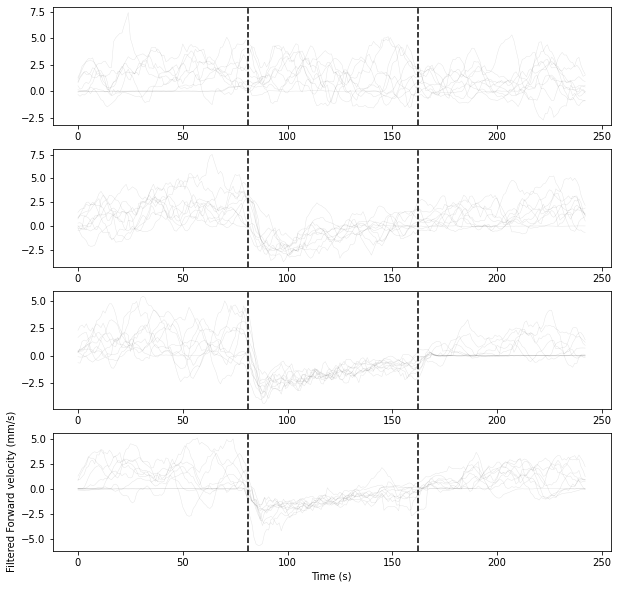

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for ax_id in range(4):
    for essay in range(10):
        axs[ax_id].plot(filtered_beh[:,4*essay+ax_id], c="k", alpha=0.1, linewidth=0.5)
    response_t_params = params.response_t_params_2p
    # draw a vertical line at the time of the stimulus
    axs[ax_id].axvline(response_t_params[0], c="k", linestyle="--")
    axs[ax_id].axvline(response_t_params[0]+response_t_params[1], c="k", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Filtered Forward velocity (mm/s)")

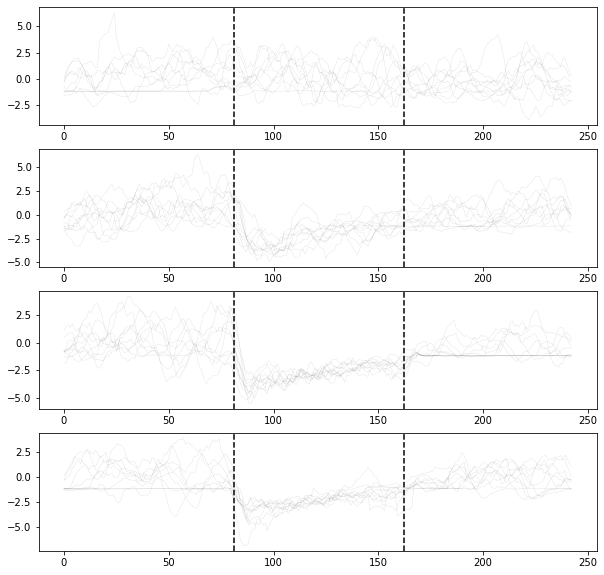

In [15]:
delta_velocity = filtered_beh - filtered_beh[response_t_params[0], :].mean(axis=0)
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for ax_id in range(4):
    for essay in range(10):
        axs[ax_id].plot(delta_velocity[:,4*essay+ax_id], c="k", alpha=0.1, linewidth=0.5)
    response_t_params = params.response_t_params_2p
    # draw a vertical line at the time of the stimulus
    axs[ax_id].axvline(response_t_params[0], c="k", linestyle="--")
    axs[ax_id].axvline(response_t_params[0]+response_t_params[1], c="k", linestyle="--")

# Compare neurons vs behavior

In [16]:


t0 = response_t_params[0]
t1 = response_t_params[0]+params.n_s_2p_1s

def get_neuron_response(neuron_id, power_id):
    return corrected_all_stim_responses[t0:t1,neuron_id,power_id]


def clear_axis(ax):
    for ax_id in range(4):
        ax[ax_id].clear()
        ax[ax_id].set_xlabel("Forward velocity (mm/s)")
        ax[ax_id].set_ylabel("Neural activity (a.u.)")
        #ax[ax_id].set_xlim([-10, 10])
        #ax[ax_id].set_ylim([-1, 1])
        plt.tight_layout()
    
def update(neuron_id, trial_id):
    # clear figure
    clear_axis(ax)
    for ax_id in range(4):
        ax[ax_id].plot(
            delta_velocity[t0:t1,4*trial_id+ax_id],
            get_neuron_response(neuron_id, 4*trial_id+ax_id),
            c = 'grey',alpha=0.5, linewidth=0.5, marker = 'o'
            )



In [20]:
#%matplotlib widget
#import ipywidgets as widgets
#fig, ax = plt.subplots(4, 1, figsize=(6, 6))

#interactive_plot = widgets.interact(
#    update,
#    neuron_id=widgets.IntSlider(min=0, max=49, step=1, value=0),
#    trial_id=widgets.IntSlider(min=0, max=9, step=1, value=0)
#    )

## Compare effective effect beh vs neural variation

In [17]:

time = np.arange(filtered_beh.shape[0])/params.fs_2p

t0 = response_t_params[0]
t1 = response_t_params[0]+params.n_s_2p_2s
t2 = response_t_params[0]+params.n_s_2p_5s

def strongest_neuron_response(neural_activity,neuron_id, power_id, period=[t0,t1]):
    index_max_var = np.argmax(np.abs(neural_activity[period[0]:period[1],neuron_id,power_id]))
    return neural_activity[period[0]:period[1],neuron_id,power_id][index_max_var]


def clear_axis(ax):
    ax.clear()
    ax.set_xlabel("Max Backwards velocity (mm/s)")
    ax.set_ylabel("Delta Neural activity (a.u.)")
    #ax.set_xlim([-10, 10])
    #ax.set_ylim([-1, 1])
    plt.tight_layout()

def fig_neuron_vs_beh(ax,neuron_id, trial_nb,behavior,neural_activity,powers_picked=None):
    colors = ['blue', 'green', 'orange', 'red']
    powers = [1, 5, 10, 20] 
    if powers_picked is None:
        range_ = range(4)
    else:
        range_ = powers_picked

    for trials in range(10):
        for essay in range_:
            ax[0,0].scatter(
                -1*np.min(behavior[t0:t1,4*trials+essay]),
                strongest_neuron_response(neural_activity,neuron_id, 4*trials+essay, period=[t0,t1]),
                c = colors[essay],alpha=0.5, linewidth=0.5, marker = 'o'
                )
            # add to each data point the trial number
            ax[0,0].text(
                -1*np.min(behavior[t0:t1,4*trials+essay]),
                strongest_neuron_response(neural_activity,neuron_id, 4*trials+essay, period=[t0,t1]),
                str(trials),
                verticalalignment="top",
                horizontalalignment="left",
                color=colors[essay],
            )
            # add text box with legend for the colors
            spacing = 0.05
            text_offset = 0
            for c_ in colors:
                text_entry = str(powers[colors.index(c_)]) + " mW"
                ax[0,0].text(
                    0.05,
                    0.95 + text_offset,
                    text_entry,
                    transform=ax[0,0].transAxes,
                    verticalalignment="top",
                    horizontalalignment="left",
                    color=c_,
                )
                text_offset -= spacing
    ax[0,0].set_xlabel("Max Backwards velocity (mm/s)")
    ax[0,0].set_ylabel("Delta Neural activity (a.u.)")

    # Detail traces upper right --- velocity
    for essay in range_:
        ax[0,1].plot(time,behavior[:,4*trial_nb+essay], c=colors[essay], alpha=0.5, linewidth=1)
    ax[0,1].axvline(t0/params.fs_2p, c="k", linestyle="--")
    ax[0,1].axvline((response_t_params[0]+response_t_params[1])/params.fs_2p, c="k", linestyle="--")
    ax[0,1].axvline(t1/params.fs_2p, c="grey", linestyle="-")
    ax[0,1].set_xlabel("Time (s)")
    ax[0,1].set_ylabel("Forward velocity (mm/s)")

    # Detail traces lower right --- neural activity
    for essay in range_:
        ax[1,1].plot(time,neural_activity[:,neuron_id,4*trial_nb+essay], c=colors[essay], alpha=0.5, linewidth=1)
    ax[1,1].axvline(t0/params.fs_2p, c="k", linestyle="--")
    ax[1,1].axvline((response_t_params[0]+response_t_params[1])/params.fs_2p, c="k", linestyle="--")
    ax[1,1].axvline(t1/params.fs_2p, c="grey", linestyle="-")
    ax[1,1].set_xlabel("Time (s)")
    ax[1,1].set_ylabel("Delta Neural activity (a.u.)")

    # Detail traces lower left --- neural activity vs velocity delta
    for essay in range_:
        ax[1,0].plot(
            behavior[t0:t1,4*trial_nb+essay],
            get_neuron_response(neuron_id, 4*trial_nb+essay),
            c = colors[essay],alpha=0.5, linewidth=0.5, marker = 'o'
            )
    ax[1,0].set_xlabel("Forward velocity (mm/s)")
    ax[1,0].set_ylabel("Delta Neural activity (a.u.)")
    
def update_total(neuron_id, trial_nb):
    # clear figure
    ax[0,0].clear()
    clear_axis(ax[0,1])
    clear_axis(ax[1,0])
    clear_axis(ax[1,1])
    fig_neuron_vs_beh(ax,neuron_id, trial_nb,filtered_beh,corrected_all_stim_responses)


In [22]:
#%matplotlib widget
#import ipywidgets as widgets
#fig, ax = plt.subplots(2, 2, figsize=(8, 6))
# 
#interactive_plot = widgets.interact(
#    update_total,
#    neuron_id=widgets.IntSlider(min=0, max=49, step=1, value=0),
#    trial_nb = widgets.IntSlider(min=0, max=9, step=1, value=0)
#    )

## Focus on special neurons

In [18]:
# DFF computation
def compute_dff(
        data: np.ndarray,
        method: str = "99_percentile",
    ):
    """
    Compute the delta F over F of the data.
    Parameters
    ----------
    data : np.ndarray
        The data to be transformed. Format time x neurons x trials.
    method : str, optional
        The method to use for the computation, by default "99_percentile". The
        data is cumulated over the trials, and the baseline is given by the 
        lowest percentile of the neuron activity.
    Returns
    -------
    np.ndarray
        The transformed data.
    """

    if method == "99_percentile":
        # cumulated data over the trials: reformat from time x neurons x trials to 
        # (time x trials) x neurons
        cumulated_data = data.reshape(-1, data.shape[1])
        # compute the baseline as the 5th percentile of the data for each neuron
        baseline = np.percentile(cumulated_data, 1, axis=0)
        baseline = baseline.reshape(1, -1, 1)
        # subtract the baseline for each neuron from the time x neurons x trials data
        # and compute the delta F over F
        data = (data - baseline) / baseline
    else:
        raise ValueError("method must be 95_percentile")
    return data
    

In [21]:
powers = [5, 10, 20]
dff = corrected_all_stim_responses

start_stim = response_t_params[0]
end_stim = response_t_params[0]+response_t_params[1]
plot_start = start_stim

neurons = [0,1,2,10,11,12,14,16,20,24,25,30,40]

for neuron_n in neurons:
    fig, axs = plt.subplots(3, 1, figsize=(6,6))
    max_val = np.max(dff[:,neuron_n,:])
    min_val = np.min(dff[:,neuron_n,:])
    for ax_id in range(3):
        power_index = ax_id+1
        for essay in range(10):
            axs[ax_id].plot(dff[:,neuron_n,4*essay+power_index],
                            c="grey", alpha=0.5, linewidth=1)
        # average over trials with 4 indices increment
        mean_response = dff[:,neuron_n,power_index::4].mean(axis=1) 
        axs[ax_id].plot(
            mean_response,
            c="k",
            alpha=1,
            linewidth=2,
            label="Stimulation: " + str(powers[ax_id]) + " mW")

        response_t_params = params.response_t_params_2p
        # draw a vertical line at the time of the stimulus
        axs[ax_id].axvline(start_stim, c="k", linestyle="--")
        axs[ax_id].axvline(end_stim, c="k", linestyle="--")
        axs[ax_id].set_ylim([min_val, max_val])
        axs[ax_id].legend(loc="upper left")
    plt.xlabel("Time (s)")
    fig.text(0.05,0.5,"Delta DFF", ha='center', va='center', rotation='vertical')
    fig.suptitle("Neuron " + str(neuron_n))
    plt.savefig(f"figures/neuron_{neuron_n}/neuron_{neuron_n}_neural_response_offset.pdf", dpi=300)
    plt.close()

Text(0.05, 0.5, 'Filtered Forward velocity (mm/s)')

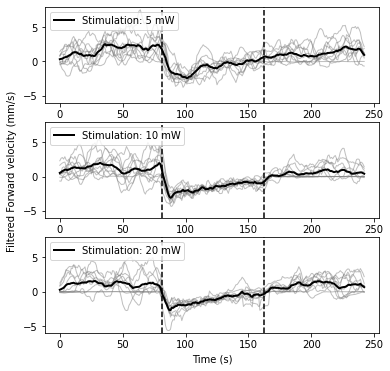

In [25]:
start_stim = response_t_params[0]
end_stim = response_t_params[0]+response_t_params[1]

fig, axs = plt.subplots(3, 1, figsize=(6,6))
for ax_id in range(3):
    power_index = ax_id+1
    for essay in range(10):
        axs[ax_id].plot(filtered_beh[:,4*essay+power_index], c="grey", alpha=0.5, linewidth=1)
    # average over trials with 4 indices increment
    mean_response = filtered_beh[:,power_index::4].mean(axis=1)
    axs[ax_id].plot(
        mean_response,
        c="k",
        alpha=1,
        linewidth=2,
        label="Stimulation: " + str(powers[ax_id]) + " mW")
    # draw a vertical line at the time of the stimulus
    axs[ax_id].axvline(start_stim, c="k", linestyle="--")
    axs[ax_id].axvline(end_stim, c="k", linestyle="--")
    axs[ax_id].set_ylim([-6, 8])
    axs[ax_id].legend(loc="upper left")
plt.xlabel("Time (s)")
fig.text(0.05,0.5,"Filtered Forward velocity (mm/s)",
          ha='center', va='center', rotation='vertical')
#plt.savefig("figures/behavioural_response.pdf", dpi=300)

In [22]:
def fig_neuron_vs_beh_detail(
        ax,
        neuron_id,
        trial_nb,
        behavior,
        neural_activity,
        powers_picked=None,
        zooming=None,
        analysis_range=None):
    colors = [SAND,SUNBURST,TEAL,STORM]
    powers = [1, 5, 10, 20] 
    if powers_picked is None:
        range_ = range(4)
    else:
        range_ = powers_picked

    if zooming is None:
        t0 = response_t_params[0]
        t1 = response_t_params[0]+response_t_params[1]
    else:
        t0 = zooming[0]
        t1 = zooming[1]

    time  = np.linspace(t0,t1,t1-t0)/params.fs_2p

    if analysis_range is None:
        t_start = response_t_params[0]
        t_end = response_t_params[0]+response_t_params[1]
    else:
        t_start = analysis_range[0]
        t_end = analysis_range[1]

    t_stim_start = params.response_t_params_2p[0]
    t_stim_end = params.response_t_params_2p[0]+params.response_t_params_2p[1]

    spacing = 0.07
    text_offset = 0

    for essay in range_:
        for trials in range(10):
            ax[0,0].scatter(
                -1*np.min(behavior[t_start:t_end,4*trials+essay]),
                strongest_neuron_response(neural_activity,neuron_id, 4*trials+essay, period=[t_start,t_end]),
                c = colors[essay],alpha=1, linewidth=0.5, marker = 'o'
                )
            # add to each data point the trial number
            ax[0,0].text(
                -1*np.min(behavior[t0:t1,4*trials+essay]),
                strongest_neuron_response(neural_activity,neuron_id, 4*trials+essay, period=[t_start,t_end]),
                str(trials),
                verticalalignment="top",
                horizontalalignment="left",
                color=colors[essay],
            )
        # add text box with legend for the colors

        text_entry = str(powers[essay]) + " mW"
        ax[0,0].text(
            0.05,
            0.95 + text_offset,
            text_entry,
            transform=ax[0,0].transAxes,
            verticalalignment="top",
            horizontalalignment="left",
            color=colors[essay],
        )
        text_offset -= spacing
        ax[0,0].axhline(0, c="grey", linestyle=":")
    ax[0,0].set_xlabel("Max Backwards velocity (mm/s)")
    ax[0,0].set_ylabel("Delta Neural activity")
    #ax[0,0].set_xlim(left=0)

    # Detail traces upper right --- velocity
    for essay in range_:
        ax[0,1].plot(time,behavior[t0:t1,4*trial_nb+essay], c=colors[essay], alpha=1, linewidth=1.5)
    ax[0,1].set_xlabel("Time (s)")
    ax[0,1].set_ylabel("Forward velocity (mm/s)")
    # add a text box with the trial name
    ax[0,1].text(
        0.5,
        0.9,
        "Trial " + str(trial_nb),
        transform=ax[0,1].transAxes,
        verticalalignment="top",
        horizontalalignment="center",
        color="k",
    )

    # Detail traces lower right --- neural activity
    for essay in range_:
        ax[1,1].plot(time,neural_activity[t0:t1,neuron_id,4*trial_nb+essay], c=colors[essay], alpha=1, linewidth=1.5)
    ax[1,1].set_xlabel("Time (s)")
    ax[1,1].set_ylabel("Delta Neural activity")

    if t_stim_start >= t0 and t_stim_start <= t1:
        ax[0,1].axvline(t_stim_start/params.fs_2p, c="k", linestyle="--")
        ax[1,1].axvline(t_stim_start/params.fs_2p, c="k", linestyle="--")
    if t_stim_end >= t0 and t_stim_end <= t1:
        ax[0,1].axvline(t_stim_end/params.fs_2p, c="k", linestyle="--")
        ax[1,1].axvline(t_stim_end/params.fs_2p, c="k", linestyle="--")
    if t_end >= t0 and t_end <= t1:
        ax[0,1].axvline(t_end/params.fs_2p, c="grey", linestyle="-")
        ax[1,1].axvline(t_end/params.fs_2p, c="grey", linestyle="-")


    # Detail traces lower left --- neural activity vs velocity delta
    for essay in range_:
        ax[1,0].plot(
            behavior[t_start:t_end,4*trial_nb+essay],
            neural_activity[t_start:t_end,neuron_id,4*trial_nb+essay],
            c = colors[essay],alpha=1, linewidth=1, marker = 'o'
            )
    ax[1,0].set_xlabel("Forward velocity (mm/s)")
    ax[1,0].set_ylabel("Delta Neural activity")
    plt.tight_layout()

In [23]:
neurons = [0,1,2,10,11,12,14,16,20,24,25,30,40]
for neuron_n in neurons:
            
    # if it doesn't exist, make a folder with the neuron name
    path_name = f"figures/neuron_{neuron_n}"
    if not os.path.exists(path_name):
        os.makedirs(path_name)

    for trial_n in range(10):

        fig, ax = plt.subplots(2, 2, figsize=(8, 6))
        zooming = [t0,t0 + params.n_s_2p_2s]
        analysis_range = [t0,t1]
        fig_neuron_vs_beh_detail(
            ax,
            neuron_n,
            trial_n,
            filtered_beh,
            corrected_all_stim_responses,
            powers_picked=[0,1,2],
            analysis_range=analysis_range,
            zooming=zooming
            )

        plt.savefig(
            os.path.join(
                path_name,
                f"neuron_{neuron_n}_trial_{trial_n}_neural_response_offset_detail_1_5_10.pdf"
                ),
            dpi=300
        )
        plt.close()

